In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Gate, ParameterVector

In [2]:
def rz01(phi):
    return Gate('$R_{Z01}$', 1, [phi])

def rz12(phi):
    return Gate('$R_{Z12}$', 1, [phi])

xi = Gate('Ξ', 1, [])
xidag = Gate('Ξ†', 1, [])
cxi = xi.control(annotated=True)
cxidag = xidag.control(annotated=True)
xplus = Gate('$X_{+}$', 1, [])
xminus = Gate('$X_{-}$', 1, [])

In [3]:
xreg = QuantumRegister(1, 'x')
yreg = QuantumRegister(1, 'y')
xprreg = QuantumRegister(1, "x'")
yprreg = QuantumRegister(1, "y'")
preg = QuantumRegister(1, 'p')
circuit = QuantumCircuit(xprreg, yprreg, xreg, yreg, preg)

qx = xreg[0]
qy = yreg[0]
qxpr = xprreg[0]
qypr = yprreg[0]
qp = preg[0]

phis = ParameterVector(r'$\phi$', 12)

In [4]:
# IIZ
circuit.cx(qypr, qx)
circuit.rz(phis[0], qx)
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [5]:
# IZZ
circuit.cx(qypr, qx)
circuit.cx(qx, qy)
circuit.rz(phis[1], qy)
circuit.cx(qx, qy)
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [6]:
# Z01ZZ
circuit.cx(qypr, qx)
circuit.cx(qx, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[2]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.cx(qx, qy)
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [7]:
# Z01IZ
circuit.cx(qypr, qx)
circuit.cx(qx, qy)
circuit.cx(qy, qx)
circuit.cx(qx, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[3]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.swap(qx, qy)
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [8]:
# Z12IZ
circuit.cx(qypr, qx)
circuit.append(xminus, [qp])
circuit.swap(qx, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[4]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.append(xplus, [qp])
circuit.cx(qx, qy)
circuit.cx(qy, qx)
circuit.cx(qx, qy)
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [9]:
# Z12ZZ
circuit.cx(qypr, qx)
circuit.append(xminus, [qp])
circuit.cx(qx, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[5]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.cx(qx, qy)
circuit.append(xplus, [qp])
circuit.cx(qypr, qx)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [10]:
# Z12ZI
circuit.cx(qypr, qy)
circuit.append(xminus, [qp])
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[6]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.append(xplus, [qp])
circuit.cx(qypr, qy)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [11]:
# Z01ZI
circuit.cx(qypr, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[7]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.cx(qypr, qy)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [12]:
# IZI
circuit.cx(qypr, qy)
circuit.rz(phis[8], qy)
circuit.cx(qypr, qy)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [13]:
# Z01II
circuit.cx(qypr, qp)
circuit.append(rz01(phis[9]), [qp])
circuit.cx(qypr, qp)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [14]:
# Z12II
circuit.cx(qypr, qp)
circuit.append(xminus, [qp])
circuit.append(rz01(phis[10]), [qp])
circuit.append(xplus, [qp])
circuit.cx(qypr, qp)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'x''), 0), Qubit(QuantumRegister(1, 'y''), 0), Qubit(QuantumRegister(1, 'x'), 0), Qubit(QuantumRegister(1, 'y'), 0), Qubit(QuantumRegister(1, 'p'), 0)), clbits=())

In [15]:
# III
circuit.rz(phis[11], qypr)

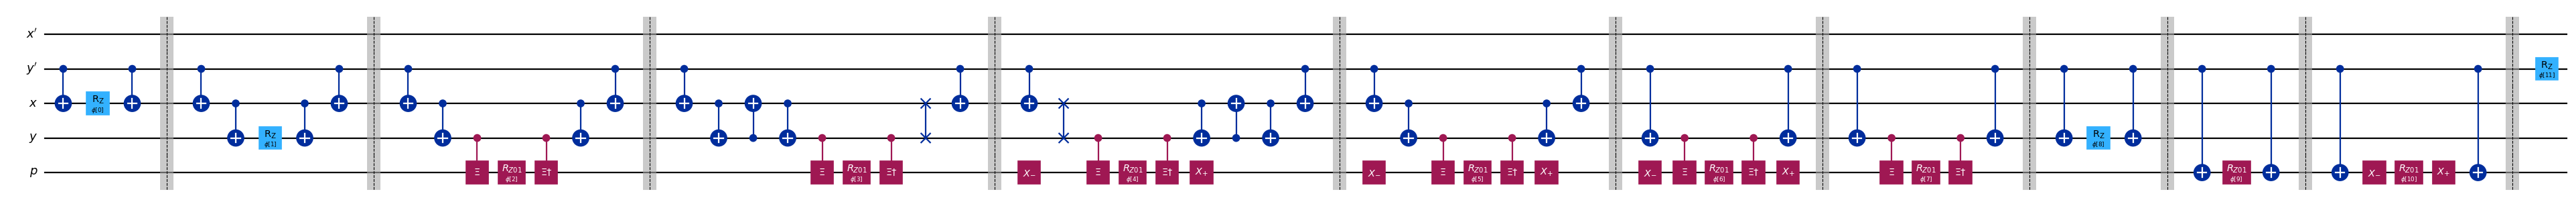

In [ ]:
circuit.draw('mpl', fold=100, scale=0.8)

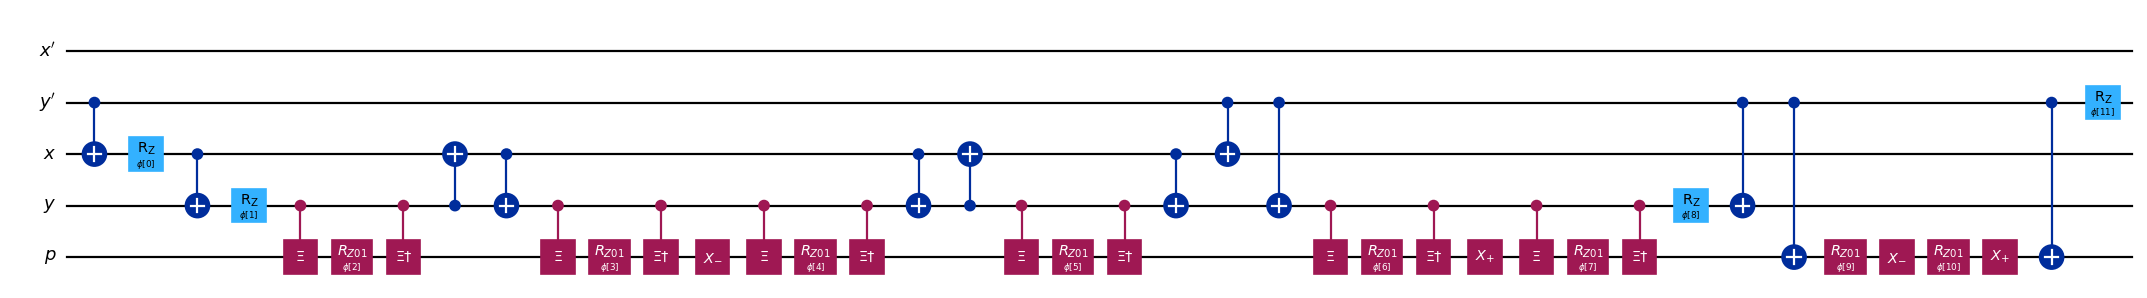

In [17]:
circuit = QuantumCircuit(xprreg, yprreg, xreg, yreg, preg)
# IIZ
circuit.cx(qypr, qx)
circuit.rz(phis[0], qx)
# IZZ
circuit.cx(qx, qy)
circuit.rz(phis[1], qy)
# Z01ZZ
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[2]), [qp])
circuit.append(cxidag, [qy, qp])
# Z01IZ
circuit.cx(qy, qx)
circuit.cx(qx, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[3]), [qp])
circuit.append(cxidag, [qy, qp])
# Z12IZ
circuit.append(xminus, [qp])
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[4]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.cx(qx, qy)
circuit.cx(qy, qx)
# Z12ZZ
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[5]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.cx(qx, qy)
circuit.cx(qypr, qx)
# Z12ZI
circuit.cx(qypr, qy)
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[6]), [qp])
circuit.append(cxidag, [qy, qp])
circuit.append(xplus, [qp])
# Z01ZI
circuit.append(cxi, [qy, qp])
circuit.append(rz01(phis[7]), [qp])
circuit.append(cxidag, [qy, qp])
# IZI
circuit.rz(phis[8], qy)
circuit.cx(qypr, qy)
# Z01II
circuit.cx(qypr, qp)
circuit.append(rz01(phis[9]), [qp])
# Z12II
circuit.append(xminus, [qp])
circuit.append(rz01(phis[10]), [qp])
circuit.append(xplus, [qp])
circuit.cx(qypr, qp)
# III
circuit.rz(phis[11], qypr)

circuit.draw('mpl', fold=100, scale=0.8)